<a href="https://colab.research.google.com/github/Arslanmp/Final-Project-DBA-Bootcamp/blob/main/Final_Project_Arslan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengimpor Package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from time import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint
plt.style.use("fivethirtyeight")

# Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mengimpor Data
Di sini saya menggunakan dua data, yakni Data_inventory dan Distribution_center

In [ ]:
Data_inventory=pd.read_csv("/content/drive/MyDrive/DATASET/inventory_items_baru (1).csv")
Distribution_center=pd.read_csv("/content/drive/MyDrive/DATASET/distribution_centers.csv")

# Menampilkan 5 baris teratas Data_inventory

In [ ]:
Data_inventory.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3


# Menampilkan Data Distribution_center

In [ ]:
Distribution_center

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


# Menampilkan dimensi data

In [ ]:
Data_inventory.shape

(487394, 12)

In [ ]:
Distribution_center.shape

(10, 4)

# Menampilkan Kolom

In [ ]:
Data_inventory.columns

Index(['id', 'product_id', 'created_at', 'sold_at', 'cost', 'product_category',
       'product_name', 'product_brand', 'product_retail_price',
       'product_department', 'product_sku', 'product_distribution_center_id'],
      dtype='object')

In [ ]:
Distribution_center.columns

Index(['id', 'name', 'latitude', 'longitude'], dtype='object')

# Menampilkan Tipe Data

In [ ]:
Data_inventory.dtypes

id                                  int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              float64
product_department                 object
product_sku                        object
product_distribution_center_id      int64
dtype: object

In [ ]:
Distribution_center.dtypes

id             int64
name          object
latitude     float64
longitude    float64
dtype: object

Insight :


1.  Pada Data_inventory, terdapat 5 kolom yang perlu diubah tipe datanya, yakni 'id', 'product_id', dan 'product_distribution_center_id' dari integer ke object, dan 'created_at' dan 'sold_at' dari object ke datetime
2.   Pada Distribution_center terdapat satu kolom yang perlu diubah tipe datanya, yakni 'id' dari integer ke object



# Mengubah Tipe Data


1.  Pada Data_inventory, terdapat 5 kolom yang perlu diubah tipe datanya, yakni 'id', 'product_id', dan 'product_distribution_center_id' dari integer ke object, dan 'created_at' dan 'sold_at' dari object ke datetime
2.   Pada Distribution_center terdapat satu kolom yang perlu diubah tipe datanya, yakni 'id' dari integer ke object

In [ ]:
Data_inventory['id'] = Data_inventory['id'].astype("object")
Data_inventory['product_id'] = Data_inventory['product_id'].astype("object")
Data_inventory['product_distribution_center_id'] = Data_inventory['product_distribution_center_id'].astype("object")
Data_inventory['created_at'] = Data_inventory['created_at'].astype("datetime64")
Data_inventory['sold_at'] = Data_inventory['sold_at'].astype("datetime64")
Distribution_center['id'] = Distribution_center['id'].astype("object")

Mari kita cek hasilnya

In [ ]:
Data_inventory.dtypes

id                                        object
product_id                                object
created_at                        datetime64[ns]
sold_at                           datetime64[ns]
cost                                     float64
product_category                          object
product_name                              object
product_brand                             object
product_retail_price                     float64
product_department                        object
product_sku                               object
product_distribution_center_id            object
dtype: object

In [ ]:
Distribution_center.dtypes

id            object
name          object
latitude     float64
longitude    float64
dtype: object

Berhasil!

# Checking & Handling Missing Value

In [ ]:
Distribution_center.isnull().sum()

id           0
name         0
latitude     0
longitude    0
dtype: int64

In [ ]:
Data_inventory.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           306886
cost                                   0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

insight : 
1. Missing value pada kolom sold_at bermakna bahwa terdapat 306.866 produk yang belum terjual. Saya akan melakukan dropna pada missing value di kolom ini karena analisis yang akan saya lakukan memerlukan data pada produk yang sudah terjual. 
2. Missing value pada product_name dan product brand akan kita biarkan dulu

In [ ]:
Inventori_clean=Data_inventory.dropna(subset=['sold_at'])

Kita cek hasilnya

In [ ]:
Inventori_clean.isnull().sum()

id                                  0
product_id                          0
created_at                          0
sold_at                             0
cost                                0
product_category                    0
product_name                       12
product_brand                     143
product_retail_price                0
product_department                  0
product_sku                         0
product_distribution_center_id      0
dtype: int64

Insight 
1. Untuk missing value di kolom sold_at sudah hilang, ini bermakna data saat ini sepenuhnya berisi tentang produk-produk yang sudah terjual
2. Ternyata untuk product_name dan product_brand masih memiliki missing value (meskipun sudah berkurang). Setelah dilakukan analisa lebih lanjut, seperti pencocokan dengan product_id dan mengintip di data product, ternyata data ini memang kosong. Ini bermakna, ada 12 produk yang meski sudah terjual tapi tidak memiliki nama produk dan 143 produk yang terjual tidak memiliki nama merk
3. Untuk missing value di kolom product_name akan saya isi dengan "tanpa_nama" dan missing value di kolom product brand akan saya isi dengan "tanpa_brand"



In [ ]:
Inventori_clean[["product_name"]] = Inventori_clean[["product_name"]].fillna("tanpa_nama")
Inventori_clean[["product_brand"]] = Inventori_clean[["product_brand"]].fillna("tanpa_brand")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Kita cek lagi!

In [ ]:
Inventori_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180508 entries, 0 to 487392
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              180508 non-null  object        
 1   product_id                      180508 non-null  object        
 2   created_at                      180508 non-null  datetime64[ns]
 3   sold_at                         180508 non-null  datetime64[ns]
 4   cost                            180508 non-null  float64       
 5   product_category                180508 non-null  object        
 6   product_name                    180508 non-null  object        
 7   product_brand                   180508 non-null  object        
 8   product_retail_price            180508 non-null  float64       
 9   product_department              180508 non-null  object        
 10  product_sku                     180508 non-null  object 

Horee! Data inventori sudah clean!

# Merging Data Inventori_clean dengan distribution center

Untuk kemudahan merge, saya akan melakukan penggantian nama kolom pada kedua data

In [ ]:
Distribution_center.rename(columns = {'id':'DC_id'}, inplace = True)
Inventori_clean.rename(columns = {'product_distribution_center_id':'DC_id'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Merge menggunakan prinsip right join

In [ ]:
Inventori_clean = Inventori_clean.merge(Distribution_center, how="right", on="DC_id")

# Eksplorasi lebih lanjut mengenai data "tanpa_nama" data "tanpa_brand" 

In [ ]:
Inventori_clean.loc[Inventori_clean.product_name.isin(["tanpa_nama"]),
    ["product_id", "product_name", "product_brand", "product_category"]]

,product_id,product_name,product_brand,product_category
19983,12586,tanpa_nama,Josie by Natori,Intimates
19984,12586,tanpa_nama,Josie by Natori,Intimates
19985,12586,tanpa_nama,Josie by Natori,Intimates
19986,12586,tanpa_nama,Josie by Natori,Intimates
19987,12586,tanpa_nama,Josie by Natori,Intimates
19988,12586,tanpa_nama,Josie by Natori,Intimates
34167,24455,tanpa_nama,Tru-Spec,Outerwear & Coats
34168,24455,tanpa_nama,Tru-Spec,Outerwear & Coats
34169,24455,tanpa_nama,Tru-Spec,Outerwear & Coats
34170,24455,tanpa_nama,Tru-Spec,Outerwear & Coats


Ternyata, produk "tanpa_nama" hanya ada pada dua jenis produk!

In [ ]:
Inventori_clean.loc[Inventori_clean.product_brand.isin(["tanpa_brand"]),
    ["product_id", "product_name", "product_brand", "product_category"]]

,product_id,product_name,product_brand,product_category
0,16898,Quiksilver Waterman Men's On The Rise,tanpa_brand,Tops & Tees
4,16898,Quiksilver Waterman Men's On The Rise,tanpa_brand,Tops & Tees
7,16898,Quiksilver Waterman Men's On The Rise,tanpa_brand,Tops & Tees
9,16898,Quiksilver Waterman Men's On The Rise,tanpa_brand,Tops & Tees
12,16898,Quiksilver Waterman Men's On The Rise,tanpa_brand,Tops & Tees
...,...,...,...,...
361,27640,O'Neill Hangover Boardshorts,tanpa_brand,Swim
363,27640,O'Neill Hangover Boardshorts,tanpa_brand,Swim
365,27640,O'Neill Hangover Boardshorts,tanpa_brand,Swim
368,27640,O'Neill Hangover Boardshorts,tanpa_brand,Swim


Karena produk "tanpa_brand" ini cukup banyak, maka saya akan coba visualisasikan dengan plot count

Pertama, saya harus membuat fungsinya dulu agar memudahkan visualisasi

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

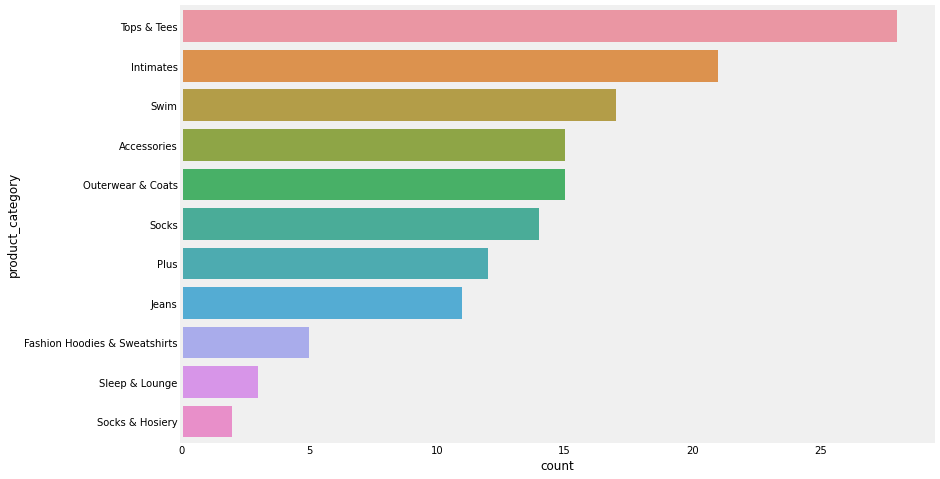

In [ ]:
plot_count(y="product_category",data=Inventori_clean[Inventori_clean.product_brand.isin(["tanpa_brand"])],
    figsize=(12, 8))

Bisa dilihat, 3 kategori produk teratas yang paling banyak memiliki produk yang tidak memiliki brand adalah kategori Top & Tees, Intimates, dan swim

# Melihat Korelasi

Biar estetik, kita lihat korelasinya pake heatmap bray!

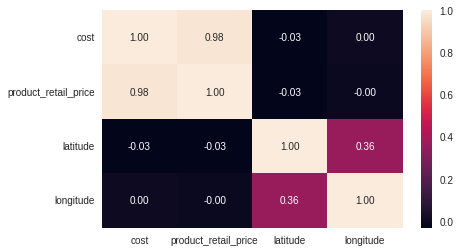

In [ ]:
sns.heatmap(Inventori_clean.corr(), annot=True, fmt=".2f")
plt.show()

Make sense banget korelasinya positif, semakin tinggi biaya produksi maka bakal makin tinggi juga harga jualnya. Gak percaya? oke, kita tambah buktinya!

(0.0, 1239.442329000181)

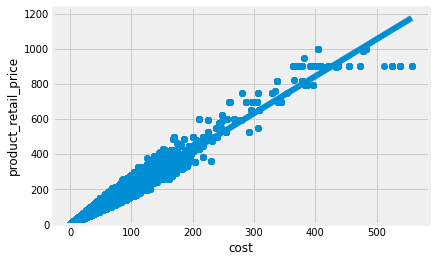

In [ ]:
sns.regplot(x=Inventori_clean["cost"],y=Inventori_clean["product_retail_price"],data=Inventori_clean)
plt.ylim(0,)

Tuh kan, jelas banget hubungannya positif, semakin tinggi si cost maka si product_retail_price nya pasti makin tinggi juga

# Mengecek Statistik Deskriptif Variabel Numerical dalam Data_inventory

In [ ]:
Inventori_clean.describe()

,cost,product_retail_price
count,180508.000000,180508.000000
mean,28.754903,59.799867
std,30.628474,65.844662
min,0.008300,0.020000
25%,11.400000,24.900000
50%,19.955011,39.990002
75%,34.715039,69.949997
max,557.151002,999.000000


Dari deskripsi tersebut, baik variabel 'cost' maupun 'product_retail_price' memiliki jarak yang sangat jauh dari Q3 ke nilai max, hal ini mengindikasikan adanya outlier! untuk membuktikannya, kita lakukan visualisasi box plot kuy!

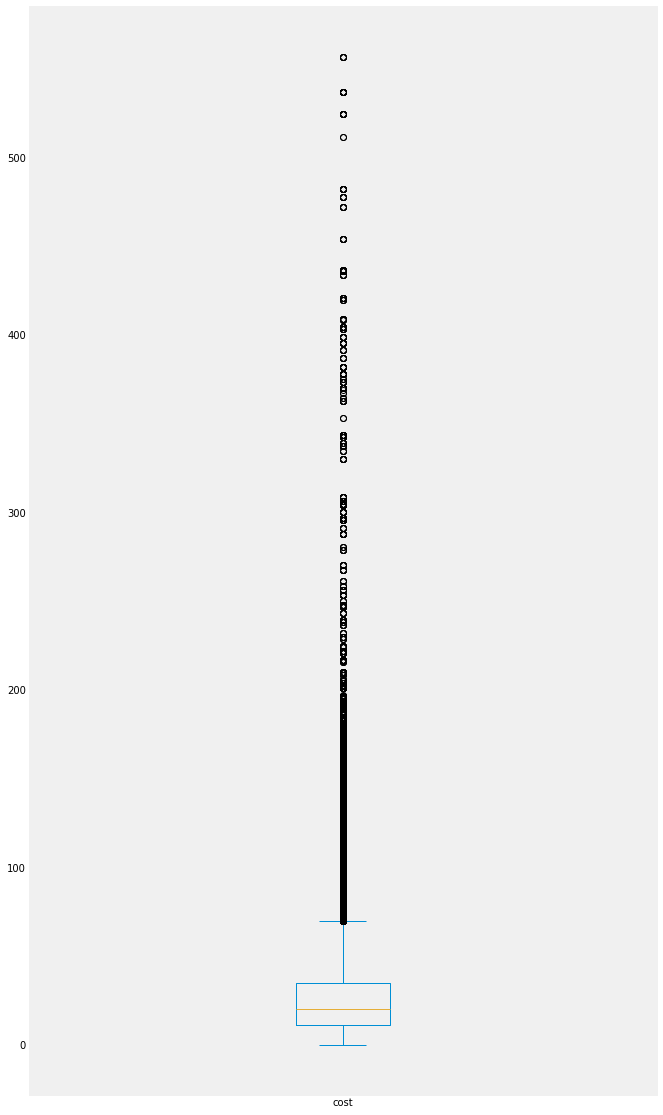

In [ ]:
Inventori_clean["cost"].plot(kind="box", figsize=(10,20))
plt.grid(False)
plt.show()

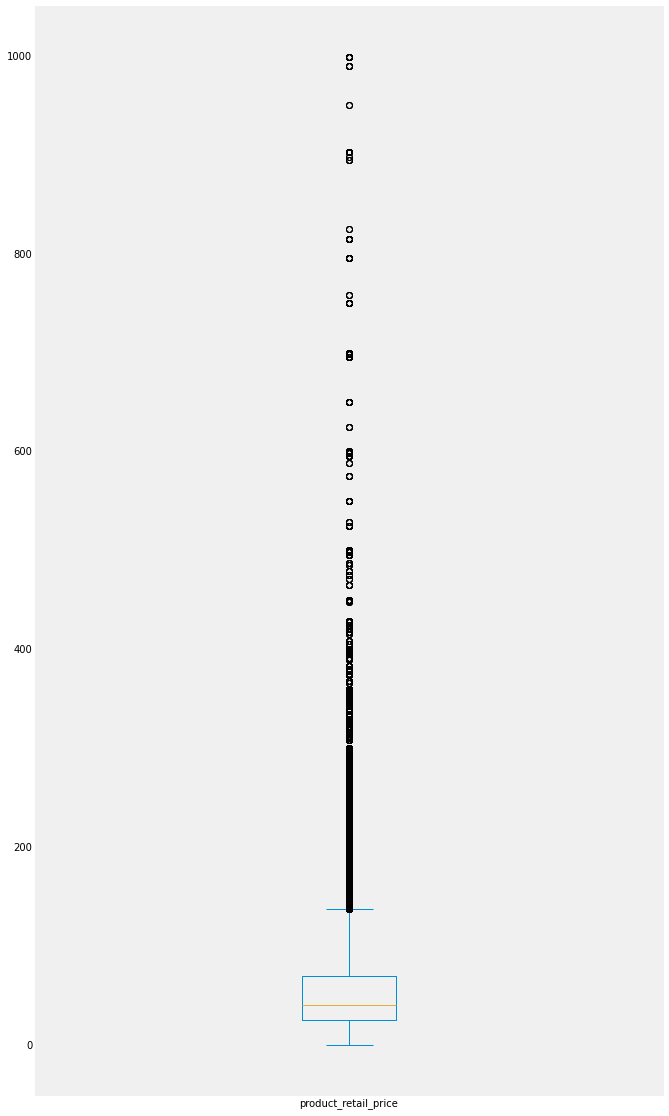

In [ ]:
Inventori_clean["product_retail_price"].plot(kind="box", figsize=(10,20))
plt.grid(False)
plt.show()

Tuh kan bener, banyak banget outliernya. Tapi, saya tidak akan melakukan outlier cleaning, karena teknik analisis yang akan saya pakai adalah clustering. Asumsi saya, bisa saja outlier ini menjadi cluster tersendiri.

# Deskripsi visualisasi

Next, saya mau coba buat beberapa visualisasi dari data yang sudah clean tadi

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(50, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

Visualisasi produk yang sudah terjual berdasarkan product_category

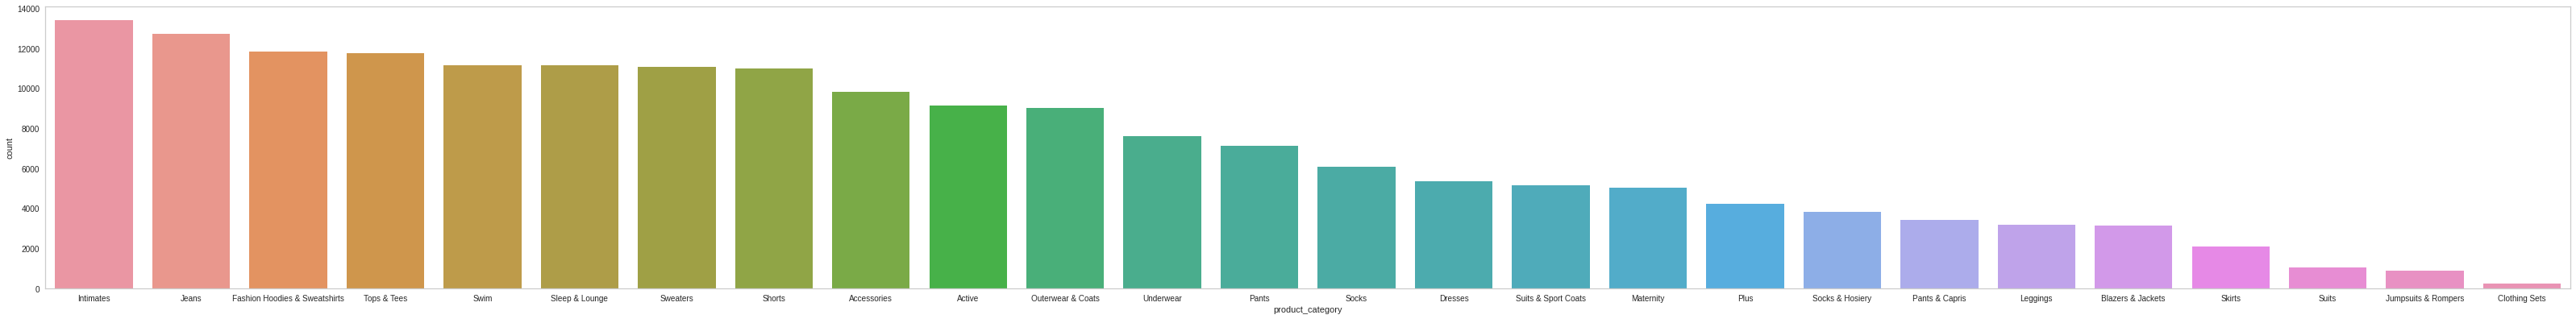

In [ ]:
plot_count(x="product_category", data=Inventori_clean)

Top 5 Product Category yang sudah terjual :
1.	Intimates
2.	Jeans
3.	Fashion Hoodies & Sweatshirt
4.	Top and Tees
5.	Swim


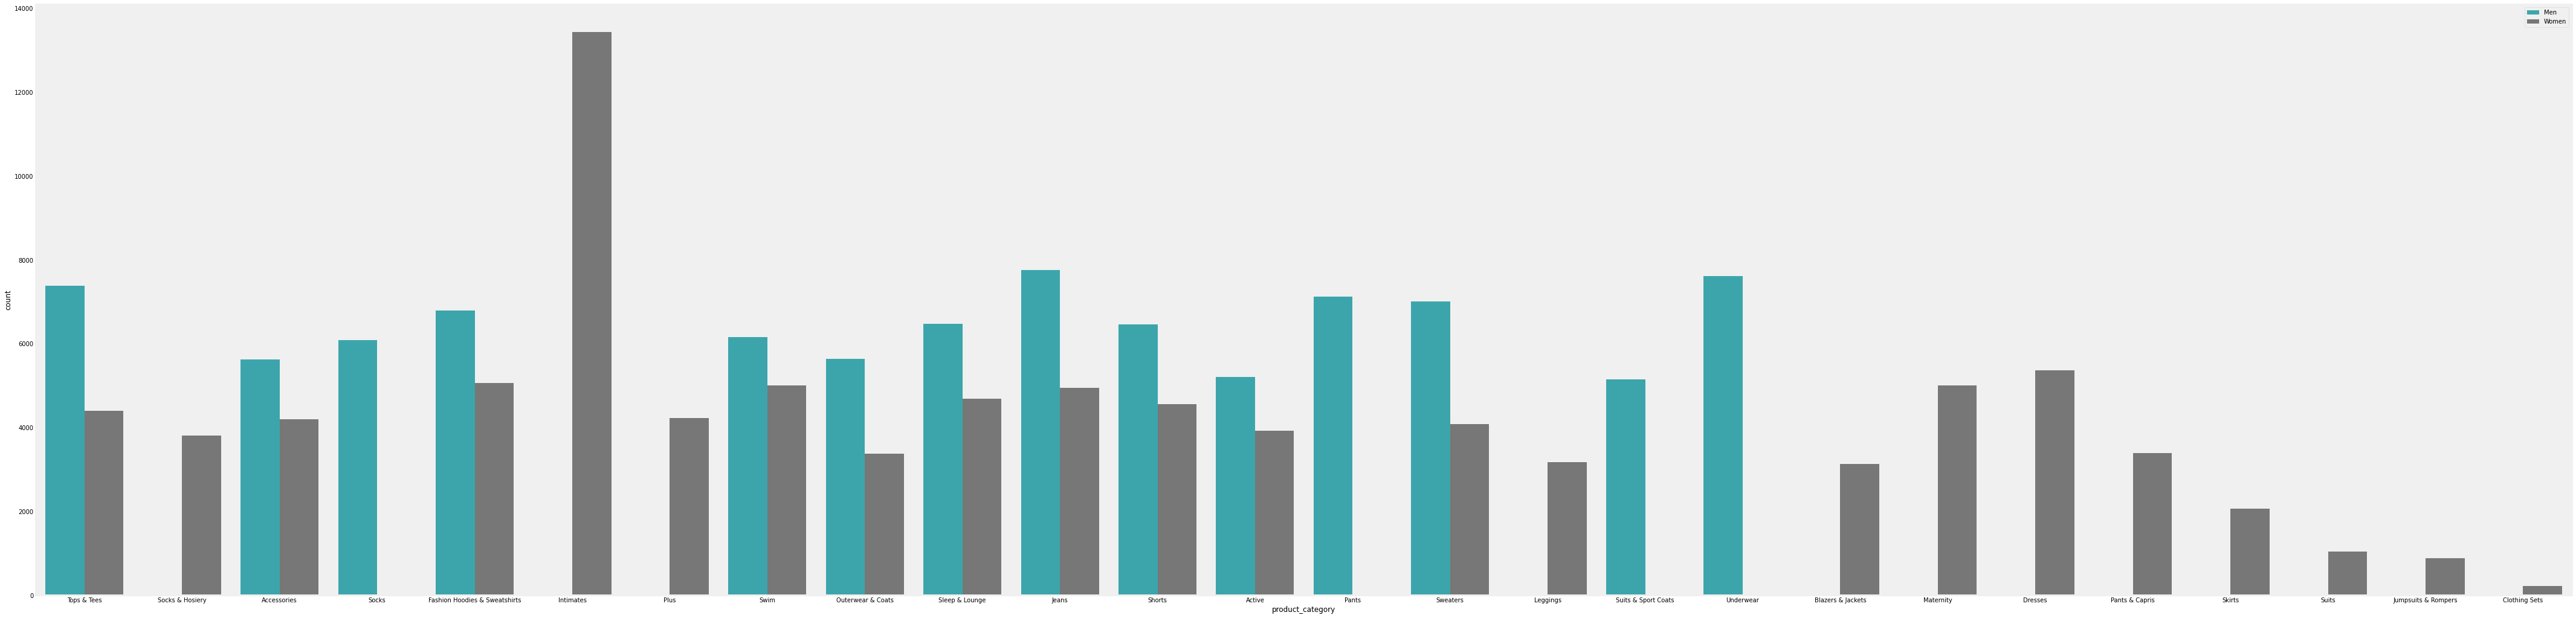

In [ ]:
plt.figure(figsize=(67, 18))
sns.countplot(
    x="product_category",
    data=Inventori_clean,
    hue="product_department",
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.legend(loc="upper right")
plt.show()

Insight
1. Ada kategori produk yang khusus untuk perempuan seperti maternity dan dress
2. Ada kategori khusus produk laki-laki seperti pants dan suit & sport coats
3. Ada kategori produk yang unisex (laki-laki & perempuan) seperti sweaters, jeans, dan swim


•	Top 5 product category women :
1.	Intimates
2.	Dresses
3.	Maternity
4.	Fashion Hoodies
5.	Swim

•	Top 5 product category men :
1.	Jeans
2.	Underwear
3.	Tops and tees
4.	Pants
5.	Sweater


# Membuat Variabel LPT (Lama Produk Terjual) dari selisih created_at dan sold_at

In [ ]:
LPT=Inventori_clean['sold_at'] - Inventori_clean['created_at']
print(LPT)

0         1 days 12:14:00
4        45 days 12:43:00
7        20 days 21:10:00
9        52 days 00:28:00
12        2 days 19:36:00
               ...       
487384   59 days 16:58:00
487386   11 days 12:48:00
487388    1 days 02:41:00
487390   57 days 14:07:00
487392   42 days 16:16:00
Length: 180508, dtype: timedelta64[ns]


Mengubah tipe data LPT dari timedelta64[ns] ke float dalam bentuk Day

In [ ]:
LPT = LPT.astype("timedelta64[D]")
LPT

0          1.0
4         45.0
7         20.0
9         52.0
12         2.0
          ... 
487384    59.0
487386    11.0
487388     1.0
487390    57.0
487392    42.0
Length: 180508, dtype: float64

Memasukkan variabel LPT ke tabel Inventori_clean

In [ ]:
Inventori_clean['LPT']=LPT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Kita cek..

In [ ]:
Inventori_clean[['created_at', 'sold_at', 'LPT']]

,created_at,sold_at,LPT
0,2021-07-19 02:20:10,2021-07-20 14:34:10,1.0
4,2020-05-09 11:16:10,2020-06-23 23:59:10,45.0
7,2021-07-22 15:42:55,2021-08-12 12:52:55,20.0
9,2021-02-13 02:34:52,2021-04-06 03:02:52,52.0
12,2022-01-19 04:15:36,2022-01-21 23:51:36,2.0
...,...,...,...
487384,2020-09-29 05:54:04,2020-11-27 22:52:04,59.0
487386,2021-03-22 04:14:01,2021-04-02 17:02:01,11.0
487388,2021-05-09 01:10:49,2021-05-10 03:51:49,1.0
487390,2021-03-18 14:42:49,2021-05-15 04:49:49,57.0


# Membuat variabel Profit dari selisih cost dan product_retail_price

In [ ]:
profit=Inventori_clean['product_retail_price'] - Inventori_clean['cost']

In [ ]:
profit

0         11.075000
4         11.075000
7         11.075000
9         11.075000
12        11.075000
            ...    
487384    19.967481
487386    19.967481
487388    19.967481
487390    19.967481
487392    19.967481
Length: 180508, dtype: float64

Memasukkan variabel profit ke tabel Inventori_clean

In [ ]:
Inventori_clean['profit']= profit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Inventori_clean.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,LPT,profit
0,90967,16898,2021-07-19 02:20:10,2021-07-20 14:34:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,1.0,11.075
4,96715,16898,2020-05-09 11:16:10,2020-06-23 23:59:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,45.0,11.075
7,147918,16898,2021-07-22 15:42:55,2021-08-12 12:52:55,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,20.0,11.075
9,166025,16898,2021-02-13 02:34:52,2021-04-06 03:02:52,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,52.0,11.075
12,184137,16898,2022-01-19 04:15:36,2022-01-21 23:51:36,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,2.0,11.075


# Memisahkan data LPT dan Profit

Untuk modeling, saya hanya akan menggunakan variabel LPT dan profit guna melihat :
1. produk apa saja yang LPT-nya lama dan profitnya kecil 
2. produk apa saja yang LPT-nya sebentar dan profitnya besar

Kita akan namai gabungan variabel LPT dan profit ini sebagai Product_clustering

In [ ]:
Product_clustering= Inventori_clean[[ 'LPT', 'profit']]
Product_clustering

,LPT,profit
0,1.0,11.075000
4,45.0,11.075000
7,20.0,11.075000
9,52.0,11.075000
12,2.0,11.075000
...,...,...
487384,59.0,19.967481
487386,11.0,19.967481
487388,1.0,19.967481
487390,57.0,19.967481


# Scalling Product_clustering

Di sini saya akan menggunakan standard scaler

In [ ]:
#MEMANGGIL STANDARD SCALER
scaler = StandardScaler()

#MENGGENERATE MODEL
scaler.fit(Product_clustering)

#MEMBUAT VARIABEL Product_clustering_scaled
Product_clustering_scaled = pd.DataFrame(scaler.transform(Product_clustering),columns=Product_clustering.columns)

In [ ]:
Product_clustering_scaled

,LPT,profit
0,-1.643760,-0.551579
1,0.894353,-0.551579
2,-0.547757,-0.551579
3,1.298144,-0.551579
4,-1.586076,-0.551579
...,...,...
180503,1.701934,-0.305965
180504,-1.066916,-0.305965
180505,-1.643760,-0.305965
180506,1.586565,-0.305965


Data sudah discalling dan siap dimodelkan!

# Clustering coba-coba dengan nilai k=5

Clusteringnya akan menggunakan algoritma K-means

In [ ]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11) #memanggil model

start = time()
kmeans_5.fit(Product_clustering_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 2.852s


In [ ]:
#predict() untuk memprediksi nilai sesuai dengan k, kita simpan hasilnya sebagai cluster_5
cluster_5=kmeans_5.predict(Product_clustering_scaled)  

In [ ]:
cluster_5

array([1, 2, 3, ..., 1, 2, 2], dtype=int32)

Next, saya akan membuat kolom baru pada data Inventori_clean yang merepresentasikan cluster dari model-model tersebut.

In [ ]:
Inventori_clean['cluster_5']=cluster_5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Cek cek cekkk..

In [ ]:
Inventori_clean.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,LPT,profit,cluster_5
0,90967,16898,2021-07-19 02:20:10,2021-07-20 14:34:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,1.0,11.075,1
4,96715,16898,2020-05-09 11:16:10,2020-06-23 23:59:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,45.0,11.075,2
7,147918,16898,2021-07-22 15:42:55,2021-08-12 12:52:55,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,20.0,11.075,3
9,166025,16898,2021-02-13 02:34:52,2021-04-06 03:02:52,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,52.0,11.075,2
12,184137,16898,2022-01-19 04:15:36,2022-01-21 23:51:36,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,tanpa_brand,25.0,Men,22811EE19846217512507785E74D12CC,3,2.0,11.075,1


BERHASIL!

# Selanjutnya, kita buat visualisasinya 

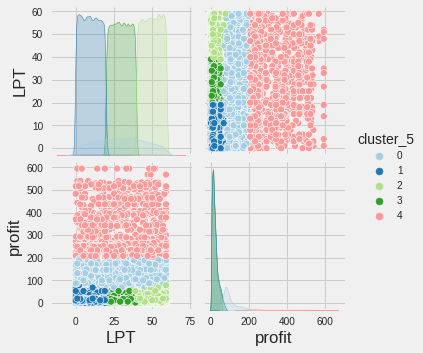

In [ ]:
sns.pairplot(Inventori_clean, vars=["LPT", "profit"], hue="cluster_5", palette="Paired")
plt.show()

Visualisasi ini belum bisa menggambarkan dengan baik persebaran cluster (tidak bisa melihat centroid, jarak dari anggota cluster ke centroid) visualisasi yang lebih baik akan ditampilkan pada CP5 menggunakan Tableau

# Cardinality cluster_5

cardinality itu sederhananya jumlah anggota tiap cluster.
Akan saya visualisasikan pakai plot_count

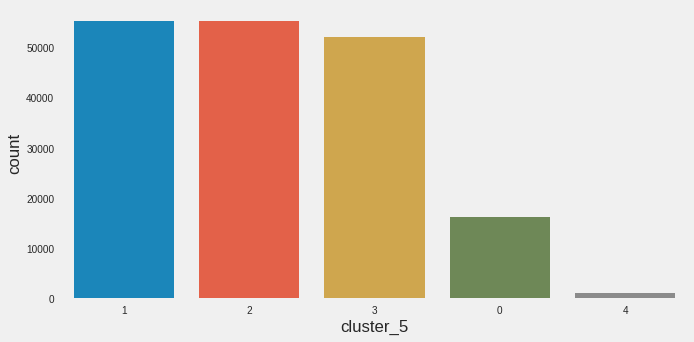

In [ ]:
plot_count(x="cluster_5", data=Inventori_clean)

Insight 


*   Terlihat perbedaan yang cukup jauh antara cluster 1,2,3 dengan cluster 0 dan 4
*   Kardinalitas yang ekstrim ini bisa ditelaah lebih jauh mengenai karakteristik produk di dalamnya



# Magnitude cluster_5

magnitude itu merujuk ke hasil penjumlahan jarak seluruh anggota sebuah cluster terhadap centroid cluster tersebut

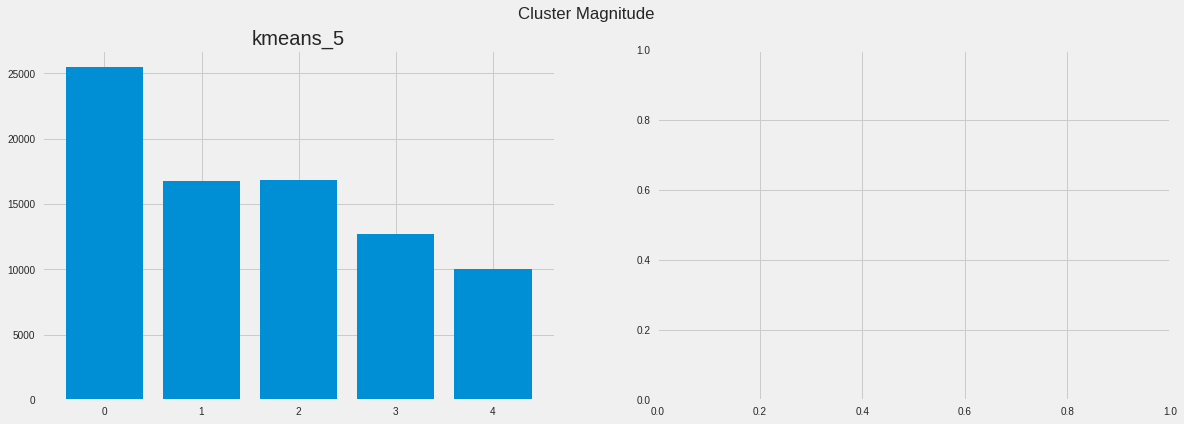

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5],["kmeans_5"]):
    distances = model.transform(Product_clustering_scaled)
    preds = model.predict(Product_clustering_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

insight 


*   Perlu diketahui bahwa, jika cardinality sebuah cluster tinggi maka magnitudenya seharusnya tinggi juga
*   Terdapat anomali pada cluster 0 di mana cardinality nya rendah tapi magnitudenya tinggi, hal ini bermakna dalam cluster 0 anggotanya sedikit tapi jaraknya berjauhan
*   Hal serupa terjadi pada cluster 4, namun tidak terlalu parah

*   Pada cluster 1,2, dan 3 sudah menunjukan hasil yang cukup baik







# Selanjutnya, kita akan mencari nilai silhoutte_score 
silhoutte_score digunakan untuk menentukan jumlah cluster paling optimal. Angkanya dari -1 (jelek) sampai 1 (bagus). score yang bagus pasti separationnya lebih besar dari pada cohesionnya.

In [ ]:
silhouette_scores = []

for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(Product_clustering_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(Product_clustering_scaled, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 1.268s
Calculating silhouette coefficient..
Done calculating in 377.617s
Clustering with n_clusters=3
Done clustering in 1.738s
Calculating silhouette coefficient..
Done calculating in 358.500s
Clustering with n_clusters=4
Done clustering in 2.751s
Calculating silhouette coefficient..
Done calculating in 368.368s
Clustering with n_clusters=5
Done clustering in 2.947s
Calculating silhouette coefficient..
Done calculating in 351.861s
Clustering with n_clusters=6
Done clustering in 4.263s
Calculating silhouette coefficient..
Done calculating in 340.908s


Kita visualize

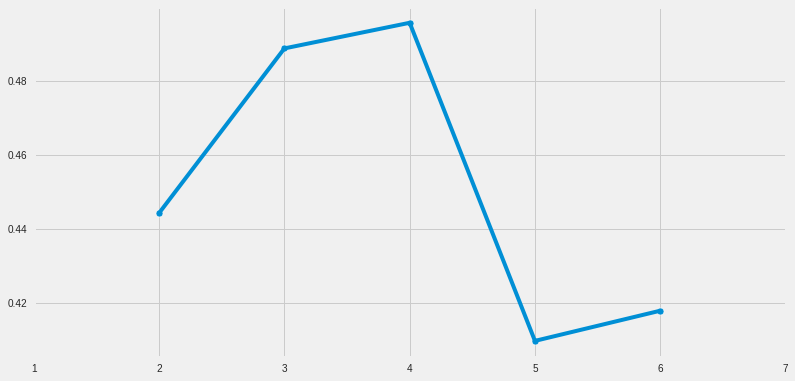

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 7), y=silhouette_scores)
sns.scatterplot(x=range(2, 7), y=silhouette_scores)
plt.xticks(range(1, 8))
plt.show()

Terlihat bahwa nilai silhouette_score yang paling tinggi terjadi ketika jumlah cluster adalah 4

# Membuat clustering model dengan nilai k=4

Langkah-langkah yang akan kita lakukan sama persis dengan ketika membuat model dengan k = 5 di atas

In [ ]:
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11) #memanggil model

start = time()
kmeans_4.fit(Product_clustering_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 2.511s


predict() untuk memprediksi nilai sesuai dengan k, kita simpan hasilnya sebagai cluster_4

In [ ]:
cluster_4=kmeans_4.predict(Product_clustering_scaled)

memasukkan cluster_4 ke Inventori_clean

In [ ]:
Inventori_clean['cluster_4']=cluster_4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Kita cek dan bandingkan

In [ ]:
Inventori_clean[['LPT', 'profit', 'cluster_4', 'cluster_5']]

,LPT,profit,cluster_4,cluster_5
0,1.0,11.075000,1,1
4,45.0,11.075000,0,2
7,20.0,11.075000,1,3
9,52.0,11.075000,0,2
12,2.0,11.075000,1,1
...,...,...,...,...
487384,59.0,19.967481,0,2
487386,11.0,19.967481,1,1
487388,1.0,19.967481,1,1
487390,57.0,19.967481,0,2


# Visualisasi cluster_4

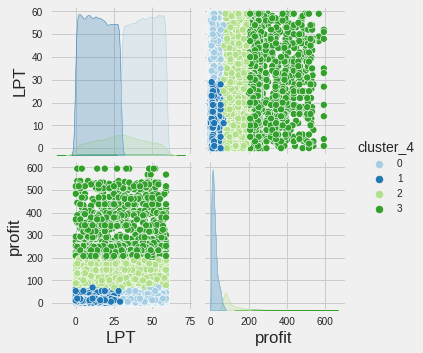

In [ ]:
sns.pairplot(Inventori_clean, vars=['LPT', 'profit'], hue="cluster_4", palette="Paired")
plt.show()

Visualisasi ini belum bisa menggambarkan dengan baik persebaran cluster (tidak bisa melihat centroid, jarak dari anggota cluster ke centroid) visualisasi yang lebih baik akan ditampilkan pada CP5 menggunakan Tableau

# Membandingkan cardinality cluster_4 dan cluster 5

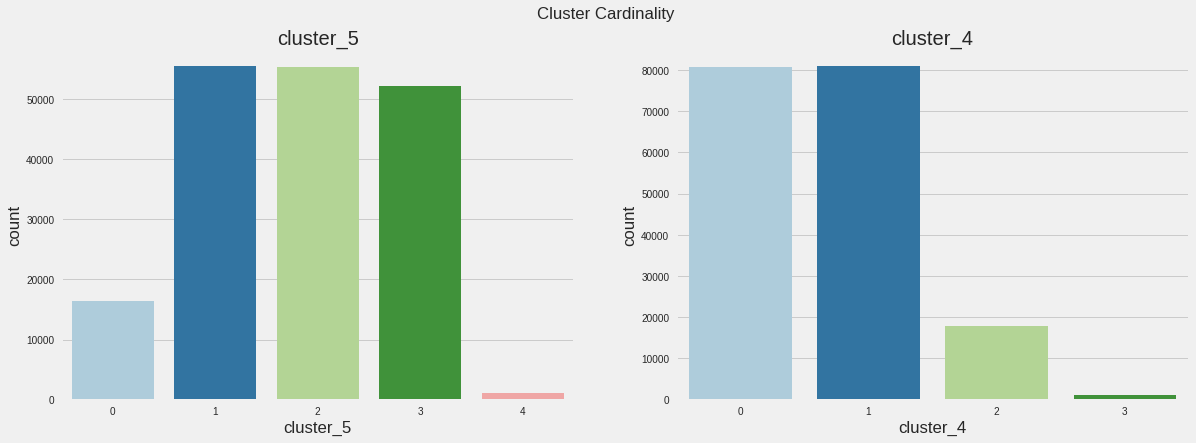

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["cluster_5", "cluster_4"]):
    sns.countplot(x=preds, data=Inventori_clean, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

Pada cluster_4 cardinalitynya masih cukup ekstrim, tapi ekstrimisme ini masih perlu dipantau lagi, apakah dapat diterima atau tidak dengan menggali lebih jauh karakteristiknya

# Membandingkan magnitude cluster_5 dan cluster_4

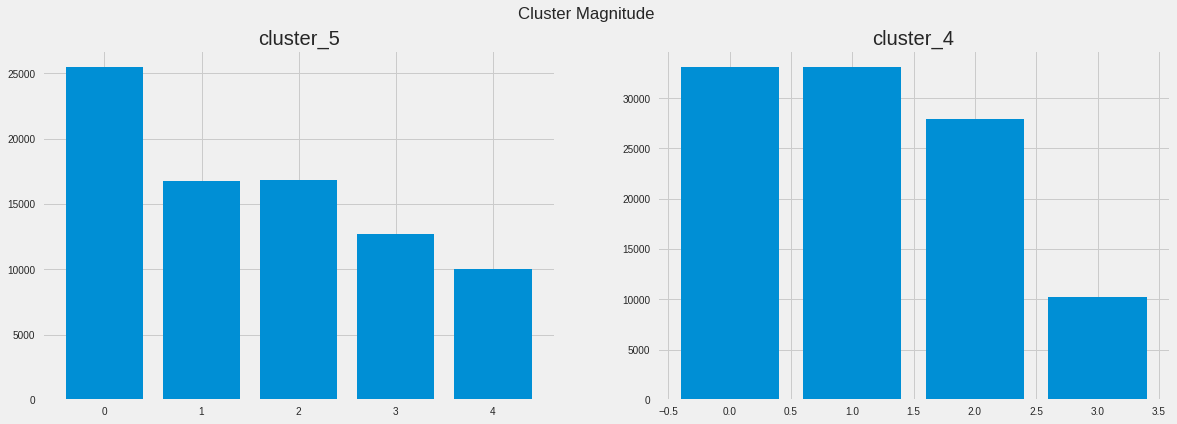

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_4],["cluster_5", "cluster_4"]):
    distances = model.transform(Product_clustering_scaled)
    preds = model.predict(Product_clustering_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

Bisa dilihat, perbandingan cardinality dan magnitude pada cluster_4 bersifat lebih baik karena menunjukan proporsi yang bagus

Mantap, hasilnya sudah oke, next kita download hasilnya dalam bentuk file excel (xlsx)

In [ ]:
Inventori_clean.to_excel('product_clustering_ready.xlsx')